In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
f1 = open("Toy.txt", "r")
f1p = str(f1.read())

In [3]:
F1 = f1p.replace('\n ', ',')
F1 = F1.replace('\n', ',')
F1 = F1.replace('[  ', '[')
F1 = F1.replace('[ ', '[')
F1 = F1.replace('   ', ',')
F1 = F1.replace('  ', ',')
F1 = F1.replace(' ', ',')

In [4]:
F1d = np.array(eval(F1[0:F1.find(',[[')]))
F1r = np.array(eval(F1[F1.find(',[[')+1:]))

In [5]:
# Now the first dataset is read in.

In [6]:
f2 = open("RepDemMatches.txt", "r")
f2p = str(f2.read()) 

In [7]:
F2 = f2p.replace('\n ', ',')
F2 = F2.replace('\n', ',')
F2 = F2.replace('[  ', '[')
F2 = F2.replace('[ ', '[')
F2 = F2.replace('   ', ',')
F2 = F2.replace('  ', ',')
F2 = F2.replace(' ', ',')

In [8]:
F2d = np.array(eval(F2[0:F2.find(',[[')]))
F2r = np.array(eval(F2[F2.find(',[[')+1:]))

In [9]:
# Now the second dataset is read in.

In [10]:
F1dT = F1d.transpose()
F1rT = F1r.transpose()
F2dT = F2d.transpose()
F2rT = F2r.transpose()

In [11]:
# Now we're going to just concern ourselves with the Daily Kos and Blaze data.

In [12]:
KosD = [F1dT[0][i] for i in range(1,len(F1dT[0]))]
KosD.extend([F2dT[0][i] for i in range(1,len(F2dT[0]))])
KosR = [F1rT[0][i] for i in range(1,len(F1rT[0]))]
KosR.extend([F2rT[0][i] for i in range(1,len(F2rT[0]))])

In [13]:
BlazeD = [F1dT[1][i] for i in range(1,len(F1dT[1]))]
BlazeD.extend([F2dT[1][i] for i in range(1,len(F2dT[1]))])
BlazeR = [F1rT[1][i] for i in range(1,len(F1rT[1]))]
BlazeR.extend([F2rT[1][i] for i in range(1,len(F2rT[1]))])

In [14]:
KosDP = [KosD[i]/(KosD[i]+KosR[i]) for i in range(len(KosD)-16)]
BlazeDP = [BlazeD[i]/(BlazeD[i]+BlazeR[i]) for i in range(len(BlazeD)-16)] # some are nans: superbowl or baloons?

In [15]:
stats.ttest_ind(KosDP, BlazeDP) #Here's the t test.

Ttest_indResult(statistic=7.443744414772836, pvalue=7.669751305565525e-13)

In [16]:
# Everything from here on down is about visualizing the different distributions.

In [17]:
Dnp = np.array([KosDP, BlazeDP])

In [18]:
labels = ['Kos' for i in range(len(KosDP))]
labels.extend(['Blaze' for i in range(len(BlazeDP))])
KosDP.extend(BlazeDP)

In [19]:
mynp = np.array([KosDP, labels])

In [20]:
Ddf = pd.DataFrame(data=mynp.transpose(), columns = ['Proportions', 'news'])

In [21]:
Ddf['Proportions'] = Ddf['Proportions'].astype(float)

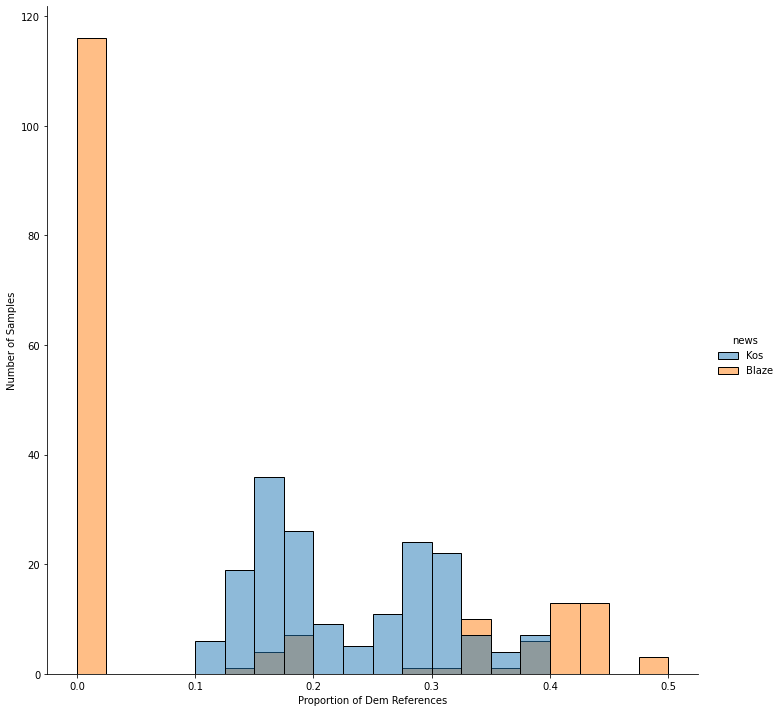

In [22]:
myplot = sns.displot(data=Ddf, x='Proportions', hue='news', kind='hist', common_norm=False,
                    height=10, bins=20)
#sns.displot(x=KosDP, kind='hist', height=5, color='Blue')
#sns.displot(x=BlazeDP, kind='hist', height=5, color='Orange')
plt.xlabel('Proportion of Dem References')
plt.ylabel('Number of Samples')
plt.show()

In [23]:
myplot.savefig('DemRefsKosBlaze.pdf')